# Part I - LOAN DATA FROM PROSPER
## by Terrance Kanyezi

## Introduction
> The dataset used in this analysis contains loan data for 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.  

## Purpose
> In this investigation, the focus is on figuring out What affects the borrower’s APR or interest rate?

## Preliminary Wrangling


In [164]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Data Gathering

In [165]:
#Load data into dataframe
loans = pd.read_csv('prosperLoanData.csv')

In [166]:
# View the dimensions of the datafeame
loans.shape

(113937, 81)

In [167]:
# View the summary statistics of the dataframe
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [168]:
# View the dataset summary:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

> The dataset contains 113937 rows and 81 columns, or variables.

### What is/are the main feature(s) of interest in your dataset?

> In this investigation, the focus is on figuring out What affects the borrower’s APR or interest rate? focus will be on the `BorrowerAPR` variable.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

| Variable | Explanation |
|:---------|:------------|
| `ListingKey` | Unique key for each listing, same value as the 'key' used in the listing object in the API. **Not needed for analysis, but rather for identifying the individual loans** |
| `BorrowerAPR` | The Borrower's Annual Percentage Rate (APR) for the loan. **Key variable under investigation** |
| `Term`     | The length of the loan expressed in months. |
| `Occupation` | The Occupation selected by the Borrower at the time they created the listing. |
| `EmploymentStatus` | The employment status of the borrower at the time they posted the listing. |
| `EmploymentStatusDuration` | The length in months of the employment status at the time the listing was created. |
| `IsBorrowerHomeowner` | A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner. |
| `ProsperRating (numeric)` | The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009. |
| `ProsperRating (Alpha)` | The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009. |
| `ProsperScore` | A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009. |
| `DebtToIncomeRatio` | The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%). |
| `IncomeRange`       | The income range of the borrower at the time the listing was created. |
| `IncomeVerifiable` | The borrower indicated they have the required documentation to support their income. |
| `StatedMonthlyIncome` | The monthly income the borrower stated at the time the listing was created. |
| `TotalProsperLoans` | Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans. |
| `Recommendations` | Number of recommendations the borrower had at the time the listing was created. |
| `Investors`      | The number of investors that funded the loan. |



## Data Cleaning

### Select columns of interest

In [169]:
#cols_needed are the columns to be viisualised
cols_needed = ["ListingKey", "BorrowerAPR", "Term", "Occupation", "EmploymentStatus", "EmploymentStatusDuration",
               "IsBorrowerHomeowner", "ProsperRating (numeric)", "ProsperRating (Alpha)", 
               "ProsperScore", "DebtToIncomeRatio", "IncomeRange",
               "IncomeVerifiable", "StatedMonthlyIncome", "TotalProsperLoans", 
               "Recommendations", "Investors"]

loans_new = loans.loc[:,cols_needed].copy()

In [170]:
loans_new.head(100)

,ListingKey,BorrowerAPR,Term,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,Recommendations,Investors
0,1021339766868145413AB3B,0.16516,36,Other,Self-employed,2.0,True,NaN,NaN,NaN,0.17,"$25,000-49,999",True,3083.333333,NaN,0,258
1,10273602499503308B223C1,0.12016,36,Professional,Employed,44.0,False,6.0,A,7.0,0.18,"$50,000-74,999",True,6125.000000,NaN,0,1
2,0EE9337825851032864889A,0.28269,36,Other,Not available,NaN,False,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,NaN,0,41
3,0EF5356002482715299901A,0.12528,36,Skilled Labor,Employed,113.0,True,6.0,A,9.0,0.15,"$25,000-49,999",True,2875.000000,NaN,0,158
4,0F023589499656230C5E3E2,0.24614,36,Executive,Employed,44.0,True,3.0,D,4.0,0.26,"$100,000+",True,9583.333333,1.0,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0FFC3601335963354A35791,0.12691,36,Analyst,Employed,48.0,True,6.0,A,8.0,0.13,"$100,000+",True,14833.333333,NaN,0,1
96,1002355507716089687F6D9,0.23718,60,Clerical,Employed,42.0,False,5.0,B,8.0,0.56,"$25,000-49,999",True,2583.333333,NaN,0,213
97,1008356191184551964B1C4,0.23121,36,Sales - Retail,Employed,30.0,False,4.0,C,6.0,0.05,"$1-24,999",True,1500.000000,1.0,0,38
98,0F653600910253363BBD659,0.17151,36,Computer Programmer,Employed,189.0,True,5.0,B,9.0,0.20,"$50,000-74,999",True,6000.000000,1.0,0,1


### Renaming columns

The aim is to have a standard naming convention for all columns:

In [171]:
# Sanitizing the column names:

loans_new.columns=["listing_key", "borrower_apr", "term", "occupation", "employment_status", "employment_status_duration",
               "is_borrower_homeowner", "prosper_rating_numeric", "prosper_rating_alpha", 
               "prosper_score", "debt_to_income_ratio", "income_range",
               "income_verifiable", "stated_monthly_income", "total_prosper_loans", 
               "recommendations", "investors"]
loans_new.head()

,listing_key,borrower_apr,term,occupation,employment_status,employment_status_duration,is_borrower_homeowner,prosper_rating_numeric,prosper_rating_alpha,prosper_score,debt_to_income_ratio,income_range,income_verifiable,stated_monthly_income,total_prosper_loans,recommendations,investors
0,1021339766868145413AB3B,0.16516,36,Other,Self-employed,2.0,True,NaN,NaN,NaN,0.17,"$25,000-49,999",True,3083.333333,NaN,0,258
1,10273602499503308B223C1,0.12016,36,Professional,Employed,44.0,False,6.0,A,7.0,0.18,"$50,000-74,999",True,6125.000000,NaN,0,1
2,0EE9337825851032864889A,0.28269,36,Other,Not available,NaN,False,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,NaN,0,41
3,0EF5356002482715299901A,0.12528,36,Skilled Labor,Employed,113.0,True,6.0,A,9.0,0.15,"$25,000-49,999",True,2875.000000,NaN,0,158
4,0F023589499656230C5E3E2,0.24614,36,Executive,Employed,44.0,True,3.0,D,4.0,0.26,"$100,000+",True,9583.333333,1.0,0,20


### Dealing with null values

In [172]:
# Check for null values
loans_new.isnull().sum()

listing_key                       0
borrower_apr                     25
term                              0
occupation                     3588
employment_status              2255
employment_status_duration     7625
is_borrower_homeowner             0
prosper_rating_numeric        29084
prosper_rating_alpha          29084
prosper_score                 29084
debt_to_income_ratio           8554
income_range                      0
income_verifiable                 0
stated_monthly_income             0
total_prosper_loans           91852
recommendations                   0
investors                         0
dtype: int64

In [173]:
# There are a lot of null values in select columns - up to 29084. It makes sense to drop these values
# First, fill all null values from the 'total_prosper_loans' column with 0.

loans_new['total_prosper_loans'] = loans_new['total_prosper_loans'].fillna(value=0)
loans_new.dropna(axis=0, inplace=True)

In [174]:
# Verifying if null values have been dropped:

loans_new.isnull().sum()

listing_key                   0
borrower_apr                  0
term                          0
occupation                    0
employment_status             0
employment_status_duration    0
is_borrower_homeowner         0
prosper_rating_numeric        0
prosper_rating_alpha          0
prosper_score                 0
debt_to_income_ratio          0
income_range                  0
income_verifiable             0
stated_monthly_income         0
total_prosper_loans           0
recommendations               0
investors                     0
dtype: int64

### Dealing with duplicate values

In [175]:
# Checking for duplicate values

sum(loans_new['listing_key'].duplicated())

730

In [176]:
#Dropping the duplicated values. The cleaned dataset is saved to the final dataframe.

loans = loans_new.drop_duplicates(subset=['listing_key'], keep='last')

In [177]:
# Verifying that duplicate values were removed:

sum(loans['listing_key'].duplicated())

0

## Univariate Exploration

#### 1. Unique values

First, we will look at the number of unique values in the dataset's columns. This will come in handy in deciding the type of visualisation to use. For variables with large numbers of unique values, univariate analysis will involve using histograms. For those with small numbers of unique values, pie charts might be a better tool.

In [178]:
# Number of unique values:
loans.nunique()

listing_key                   75486
borrower_apr                   2173
term                              3
occupation                       67
employment_status                 7
employment_status_duration      583
is_borrower_homeowner             2
prosper_rating_numeric            7
prosper_rating_alpha              7
prosper_score                    11
debt_to_income_ratio            258
income_range                      6
income_verifiable                 2
stated_monthly_income          8887
total_prosper_loans               9
recommendations                   9
investors                       681
dtype: int64

#### 2. `borrower_apr`

For a start, it's important to analyse the variable of interest: `borrower_apr`.
The aim is to see the general distribution of this variable.

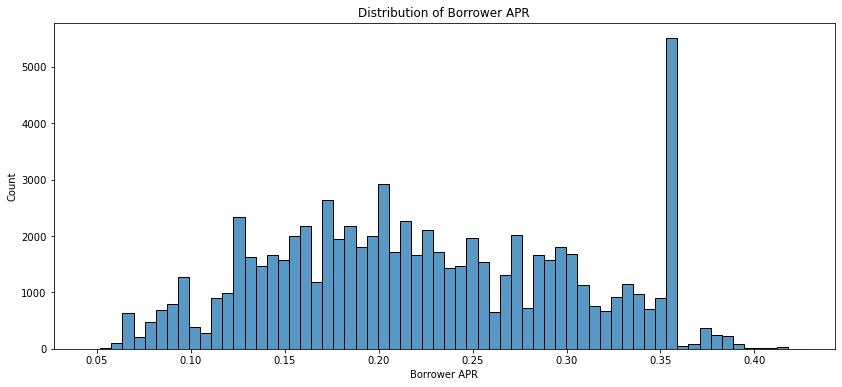

In [179]:
plt.figure(figsize=[14, 6])
sb.histplot(x='borrower_apr', data=loans)
plt.xlabel('Borrower APR')
plt.title('Distribution of Borrower APR');
plt.show()

Most loans seem to have an APR of around 0.36%. The least APR values seem to be 0.05%, 0.40% and higher and 0.37%.

#### 2.` term`

Next we look at the term of the loans. The aim is to see the relative proportions of these loan terms.

<Figure size 1008x432 with 0 Axes>

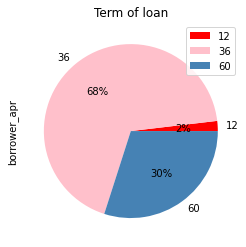

In [180]:
plt.figure(figsize=[14, 6])
loans.groupby(['term']).count().plot(kind='pie', y='borrower_apr', autopct='%1.0f%%',
                                colors = ['red', 'pink', 'steelblue'],
                                title='Term of loan');

The `term` variable is quite interesting. As can be seen from the pie chart:
1. 68% of loans are of the 36 months duration
2. 30% of loans are of the 60 months duration.
3. Only 2% of loans are of 12 months duration.

#### 3. `occupation`

We then look at the occupations of the clients. Here we intent to see the occupations with the highest number of clients, to see a representation of which occupations are more likely to get loans approved.

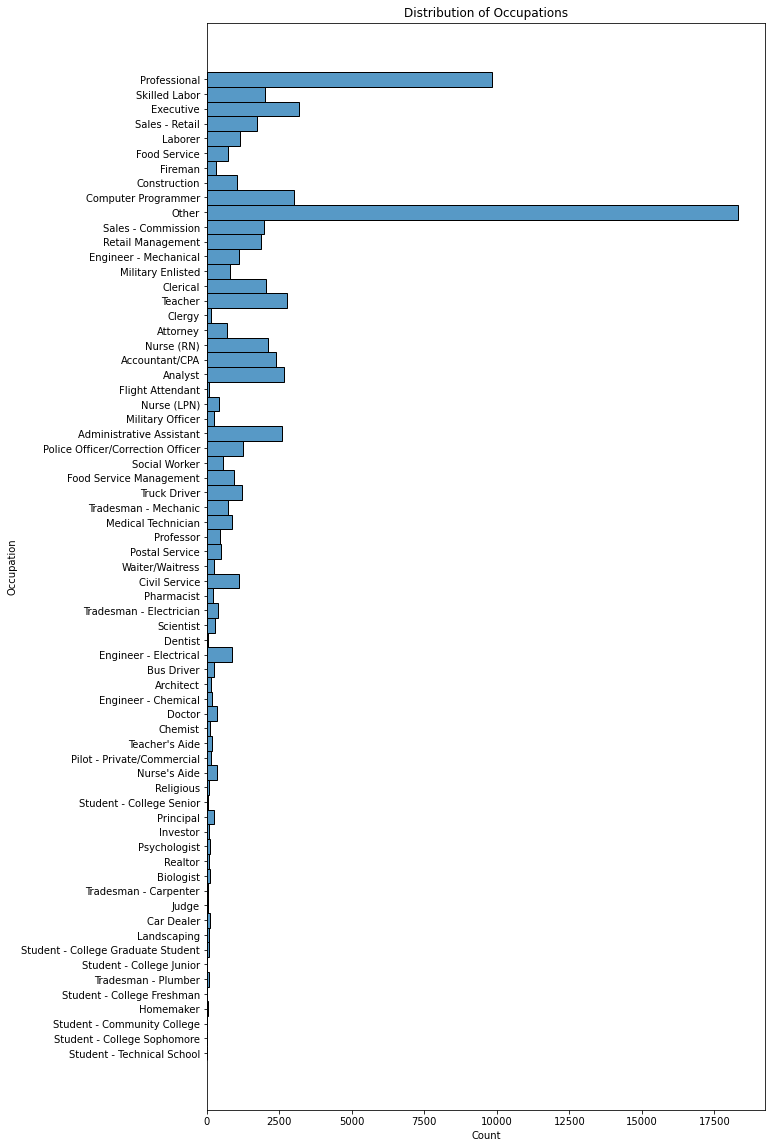

In [181]:
plt.figure(figsize=[10, 20])
sb.histplot(y='occupation', data=loans)
plt.ylabel('Occupation')
plt.title('Distribution of Occupations');
plt.show()

Computer Programmers, analysts, accoutants and administrative assistants seem to be among the highest loan takers. From intuition, it would appear as if the highest loan takers would be in the laborers category, but it is interesting to note that it actually is the professionals and executives who have high loan margins.

#### 4. ProsperRating (numeric)

The aim is to get an overview of the distribution of the Numeric Prosper Rating:

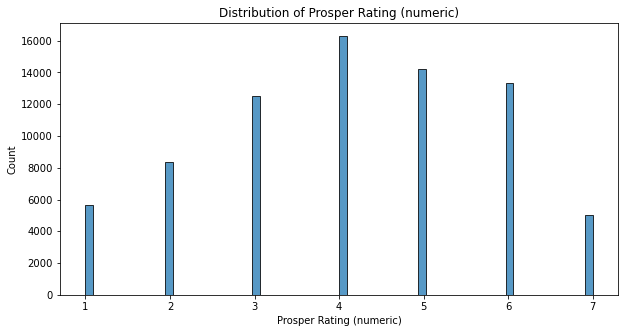

In [182]:
plt.figure(figsize=[10, 5])
sb.histplot(x='prosper_rating_numeric', data=loans)
plt.xlabel('Prosper Rating (numeric)')
plt.title('Distribution of Prosper Rating (numeric)');
plt.show()

The distribution is almost a normal distribution. The highest frequency being 4at the rating 4.

#### 5. Prosper Rating Alpha

The question is to get an overview of the distribution of the Numeric Prosper Rating:

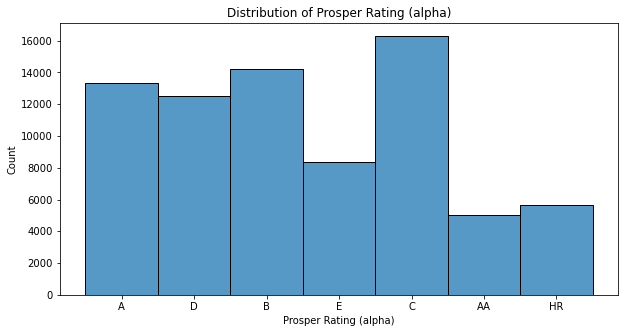

In [183]:
plt.figure(figsize=[10, 5])
sb.histplot(x='prosper_rating_alpha', data=loans)
plt.xlabel('Prosper Rating (alpha)')
plt.title('Distribution of Prosper Rating (alpha)');
plt.show()

Here we see that AA and HR have the least frequency, and C has the highest. A, D, B have an almost similar frequency pattern.

#### 6. Prosper Score

Here we analyse the distribution of the prosper score:

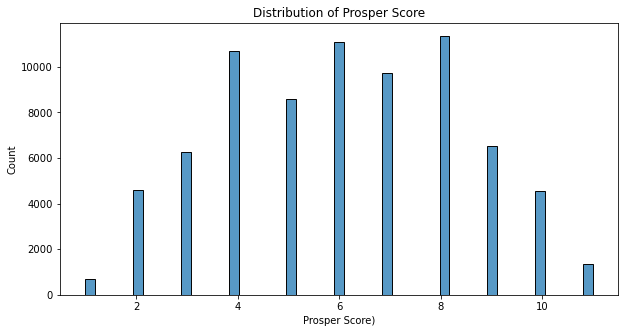

In [184]:
plt.figure(figsize=[10, 5])
sb.histplot(x='prosper_score', data=loans)
plt.xlabel('Prosper Score)')
plt.title('Distribution of Prosper Score');
plt.show()

The Prosper Score is quiet interesting. It rises from 1 to 8, then starts tipping till 10.01. Interestingly, 5 and 7 are dips in this pattern, and 4, 6 and 8 have an almost equal frequency.

#### 7. Debt To Income Ratio

Looking at the distribution of the Income Ratio:

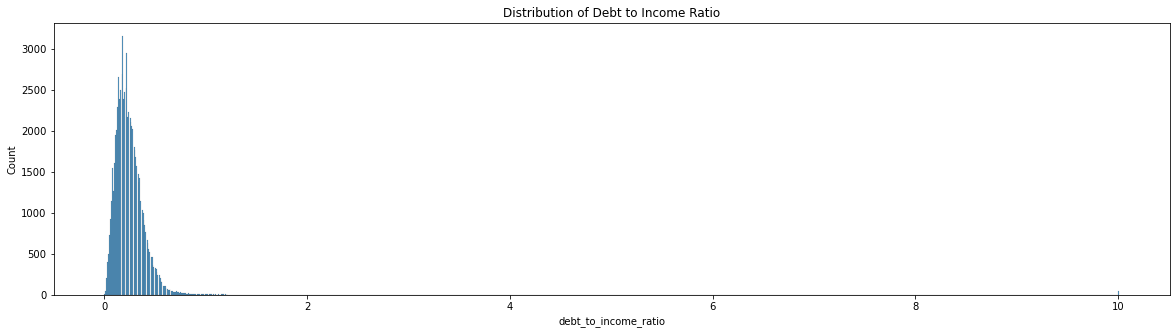

In [186]:
plt.figure(figsize=[20, 5])
sb.histplot(x='debt_to_income_ratio', data=loans)
plt.xlabel('debt_to_income_ratio')
plt.title('Distribution of Debt to Income Ratio');
plt.show()

This one is interesting. The points basically concentrated between 0 and 1, with several peaks in between the.

#### 8. Income Range

Analysing the distribution of the Income Range

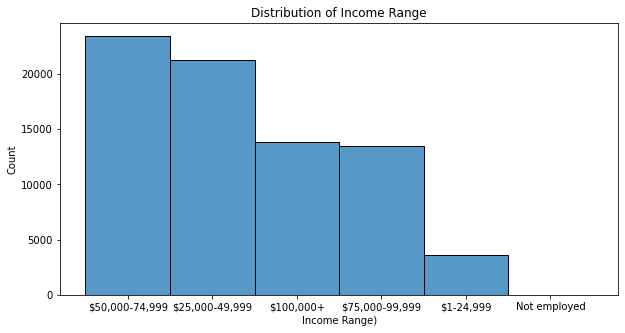

In [234]:
plt.figure(figsize=[10, 5])
sb.histplot(x='income_range', data=loans)
plt.xlabel('Income Range)')
plt.title('Distribution of Income Range');
plt.show();

The most populous salary range is the $50,000 - $74,999. This is almost similar to  the $25,000 - $49,999. The $1 - $24,999 and the unemployed ranges, are the least common.

#### 9. Total Prosper_Loans

Checking the distribution of the Total Prosper Loans column:

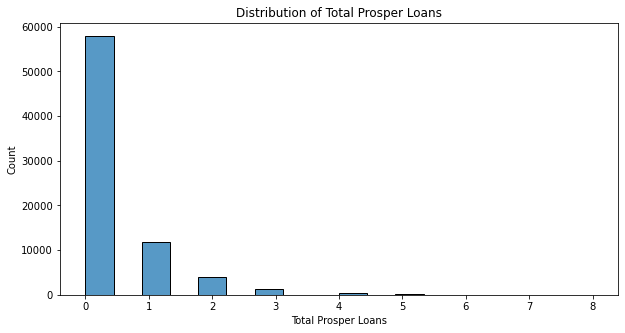

In [188]:
plt.figure(figsize=[10, 5])
sb.histplot(x='total_prosper_loans', data=loans)
plt.xlabel('Total Prosper Loans')
plt.title('Distribution of Total Prosper Loans');
plt.show();

Most clients do not have prior loand. However, the number of clients getting loans is inversely proportional to the number of previous loans still open.

#### 10. Employment Status

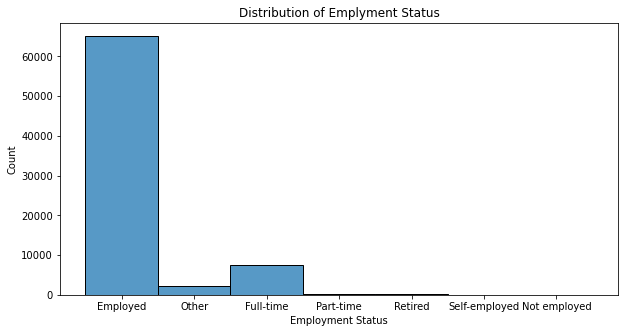

In [189]:
plt.figure(figsize=[10, 5])
sb.histplot(x='employment_status', data=loans)
plt.xlabel('Employment Status')
plt.title('Distribution of Emplyment Status');
plt.show();

Most loans are granted to those currently employed. Of these, about 10% are in full time employment. Almost no loans are given to those currently unemployed or self employed.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The values of the borrower APR mostly occur at range of 0.05 and 0.40. There are no unusual points, and as such there was no need to perform any transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were no unusual distributions, and there was no need to tidy, adjust or change the form of the data.

## Bivariate Exploration

Since the variable of interest is `BorrowerAPR`, the aim of this analysis is to compare it to other vriables to determine corellation.

#### 1. Borrower APR vs Prosper Score

Text(0, 0.5, 'Borrower APR')

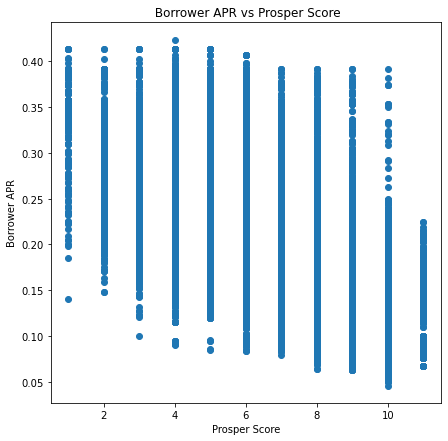

In [208]:
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.scatter(loans.prosper_score, loans.borrower_apr)
plt.title(' Borrower APR vs Prosper Score')
plt.xlabel('Prosper Score')
plt.ylabel('Borrower APR');

From this plot, one can deduce that there is a negative correlation between Prosper Score and Borrower APR. Generally - for the majority of cases, if the prosper score is higher, the APR will be lower.

#### 2. Income range vs Borrower APR

Text(0, 0.5, 'Borrower APR')

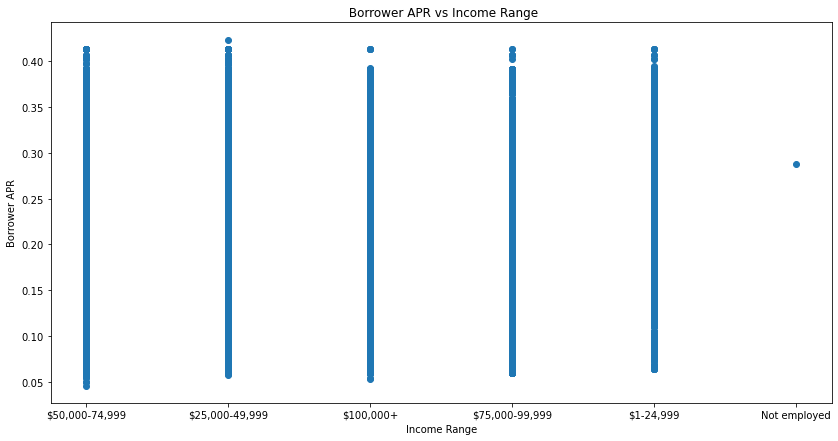

In [228]:
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(7)
plt.scatter(loans.income_range, loans.borrower_apr)
plt.title(' Borrower APR vs Income Range')
plt.xlabel('Income Range')
plt.ylabel('Borrower APR');

The graph indicates that there is no correlation between the 2 variables, income range and the APR. Exception is on "Not Employed", where there are the fewest loans.

#### 3. Debt to Income Ratio vs Borrower BPR

Text(0, 0.5, 'Borrower APR')

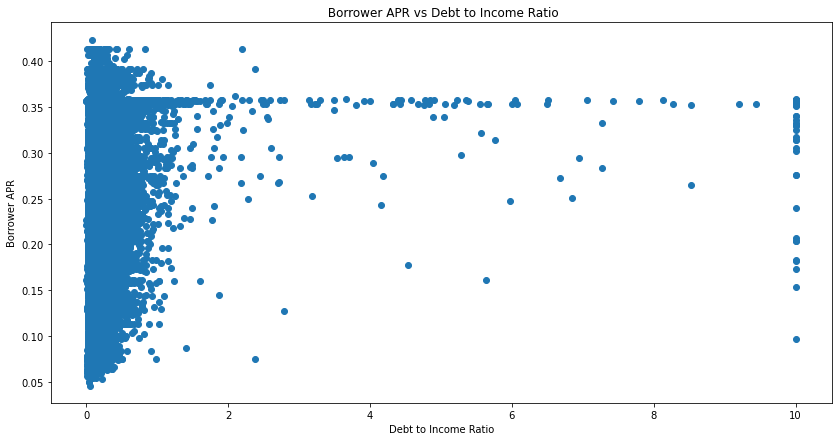

In [230]:
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(7)
plt.scatter(loans.debt_to_income_ratio, loans.borrower_apr)
plt.title(' Borrower APR vs Debt to Income Ratio')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Borrower APR');

Again there seems to be no direct correlation between debt_to_income_ratio and APR. However, there is correlation between debt_to_income_ratio and actually getting a loan. Generally people with lower debt to income ratios are more likely to get loans.

#### 4. Total Prosper Loans vs Borrower BPR

Text(0, 0.5, 'Borrower APR')

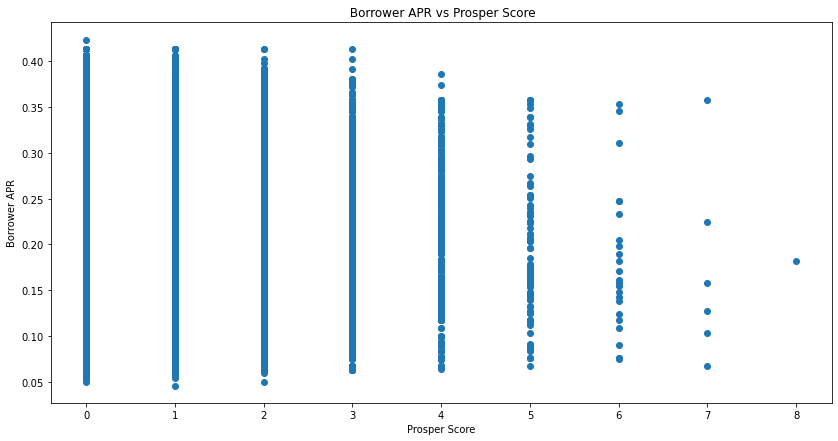

In [231]:


f = plt.figure()
f.set_figwidth(14)
f.set_figheight(7)
plt.scatter(loans.total_prosper_loans, loans.borrower_apr)
plt.title(' Borrower APR vs Total Prosper Loans')
plt.xlabel('Total Prosper Loans')
plt.ylabel('Borrower APR');

There also seems to be no direct correlation between Total Prosper Loans and APR. However, there is correlation between Total Prosper Loans and actually getting a loan. Generally people with lower Total Prosper Loans are more likely to get a loan.

### How did the feature(s) of interest vary with other features in the dataset?

>  The Prosper Score has a strong effect on the borrower APR, which decreases with the better rating.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a strong relationship between 
> 1. The debt to income ratio and the possibility of getting a loan. Generally a higher debt to income ratio reduces one's chances of getting funded.
> 2. Total Propser Loans and the possibiity of getting a loan. Higher Total Prosper Loan values make it harder to get a loan.

## Multivariate Exploration

> The main thing I want to explore in this section of the correlation of every fariable to every other variable.

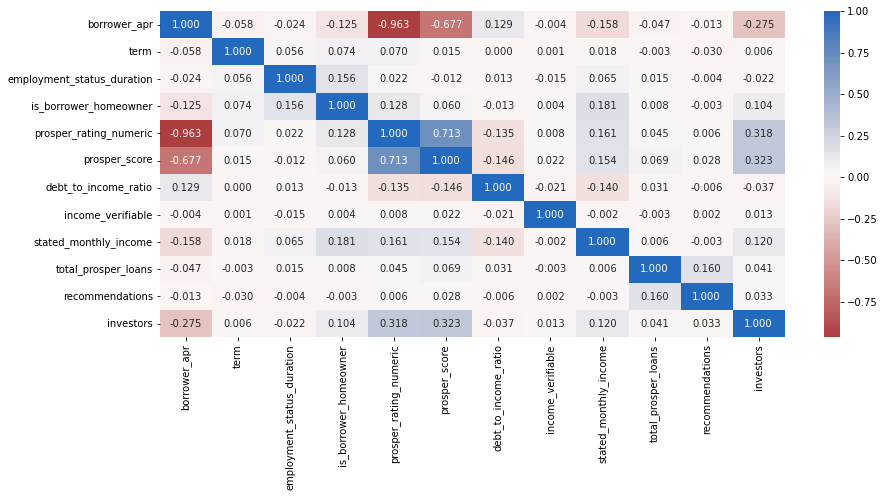

In [233]:
# Plotting the correlation heatmap:
plt.figure(figsize =[14, 6])
sb.heatmap(loans.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

There is a strong negative correlation between:
1. Prosper rating numeric and borrower_apr
2. prosper score and borrower_apr

Most other correlations exhibited in this dataset are weak.

### Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> None from this dataset.

### Were there any interesting or surprising interactions between features?

> A surprising interaction is that there is almost no correlation between income_verifiable and 

## Limitations

> The analysis focused on correlations, and does not attempt to carry out statistical tests for causality.

## Credits

The following are credited for the successful development of this project:
1. Udacity nanodegree program in Data Analysis
2. Freecodecamp python for data analysis program 
3. Stackoverflow search
4. Python and pandas official documentation
5. Further help from other developers - One on One lessons.